# K Nearest Neighbors - Projeto 

Bem-vindo ao Projeto de KNN! Este será um projeto simples e muito parecido com o notebook, com a diferença de que você receberá outro conjunto de dados. Vá em frente e siga as instruções abaixo.
## Importar bibliotecas
** Importe pandas, seaborn e as bibliotecas usuais. **

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Obtenha os dados
** Leia o arquivo csv 'KNN_Project_Data' em um DataFrame **

In [20]:
data = pd.read_csv('data/KNN_Project_Data.csv')

** Verifique o cabeçalho do DataFrame.**

In [21]:
data.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


In [44]:
data.shape

(1000, 11)

# Análise exploratória de dados

Uma vez que esses dados são artificiais, vamos criar um grande pairplot com o Seaborn.

** Use seaborn no DataFrame para criar um pairplot com a tonalidade indicada pela coluna TARGET CLASS. **

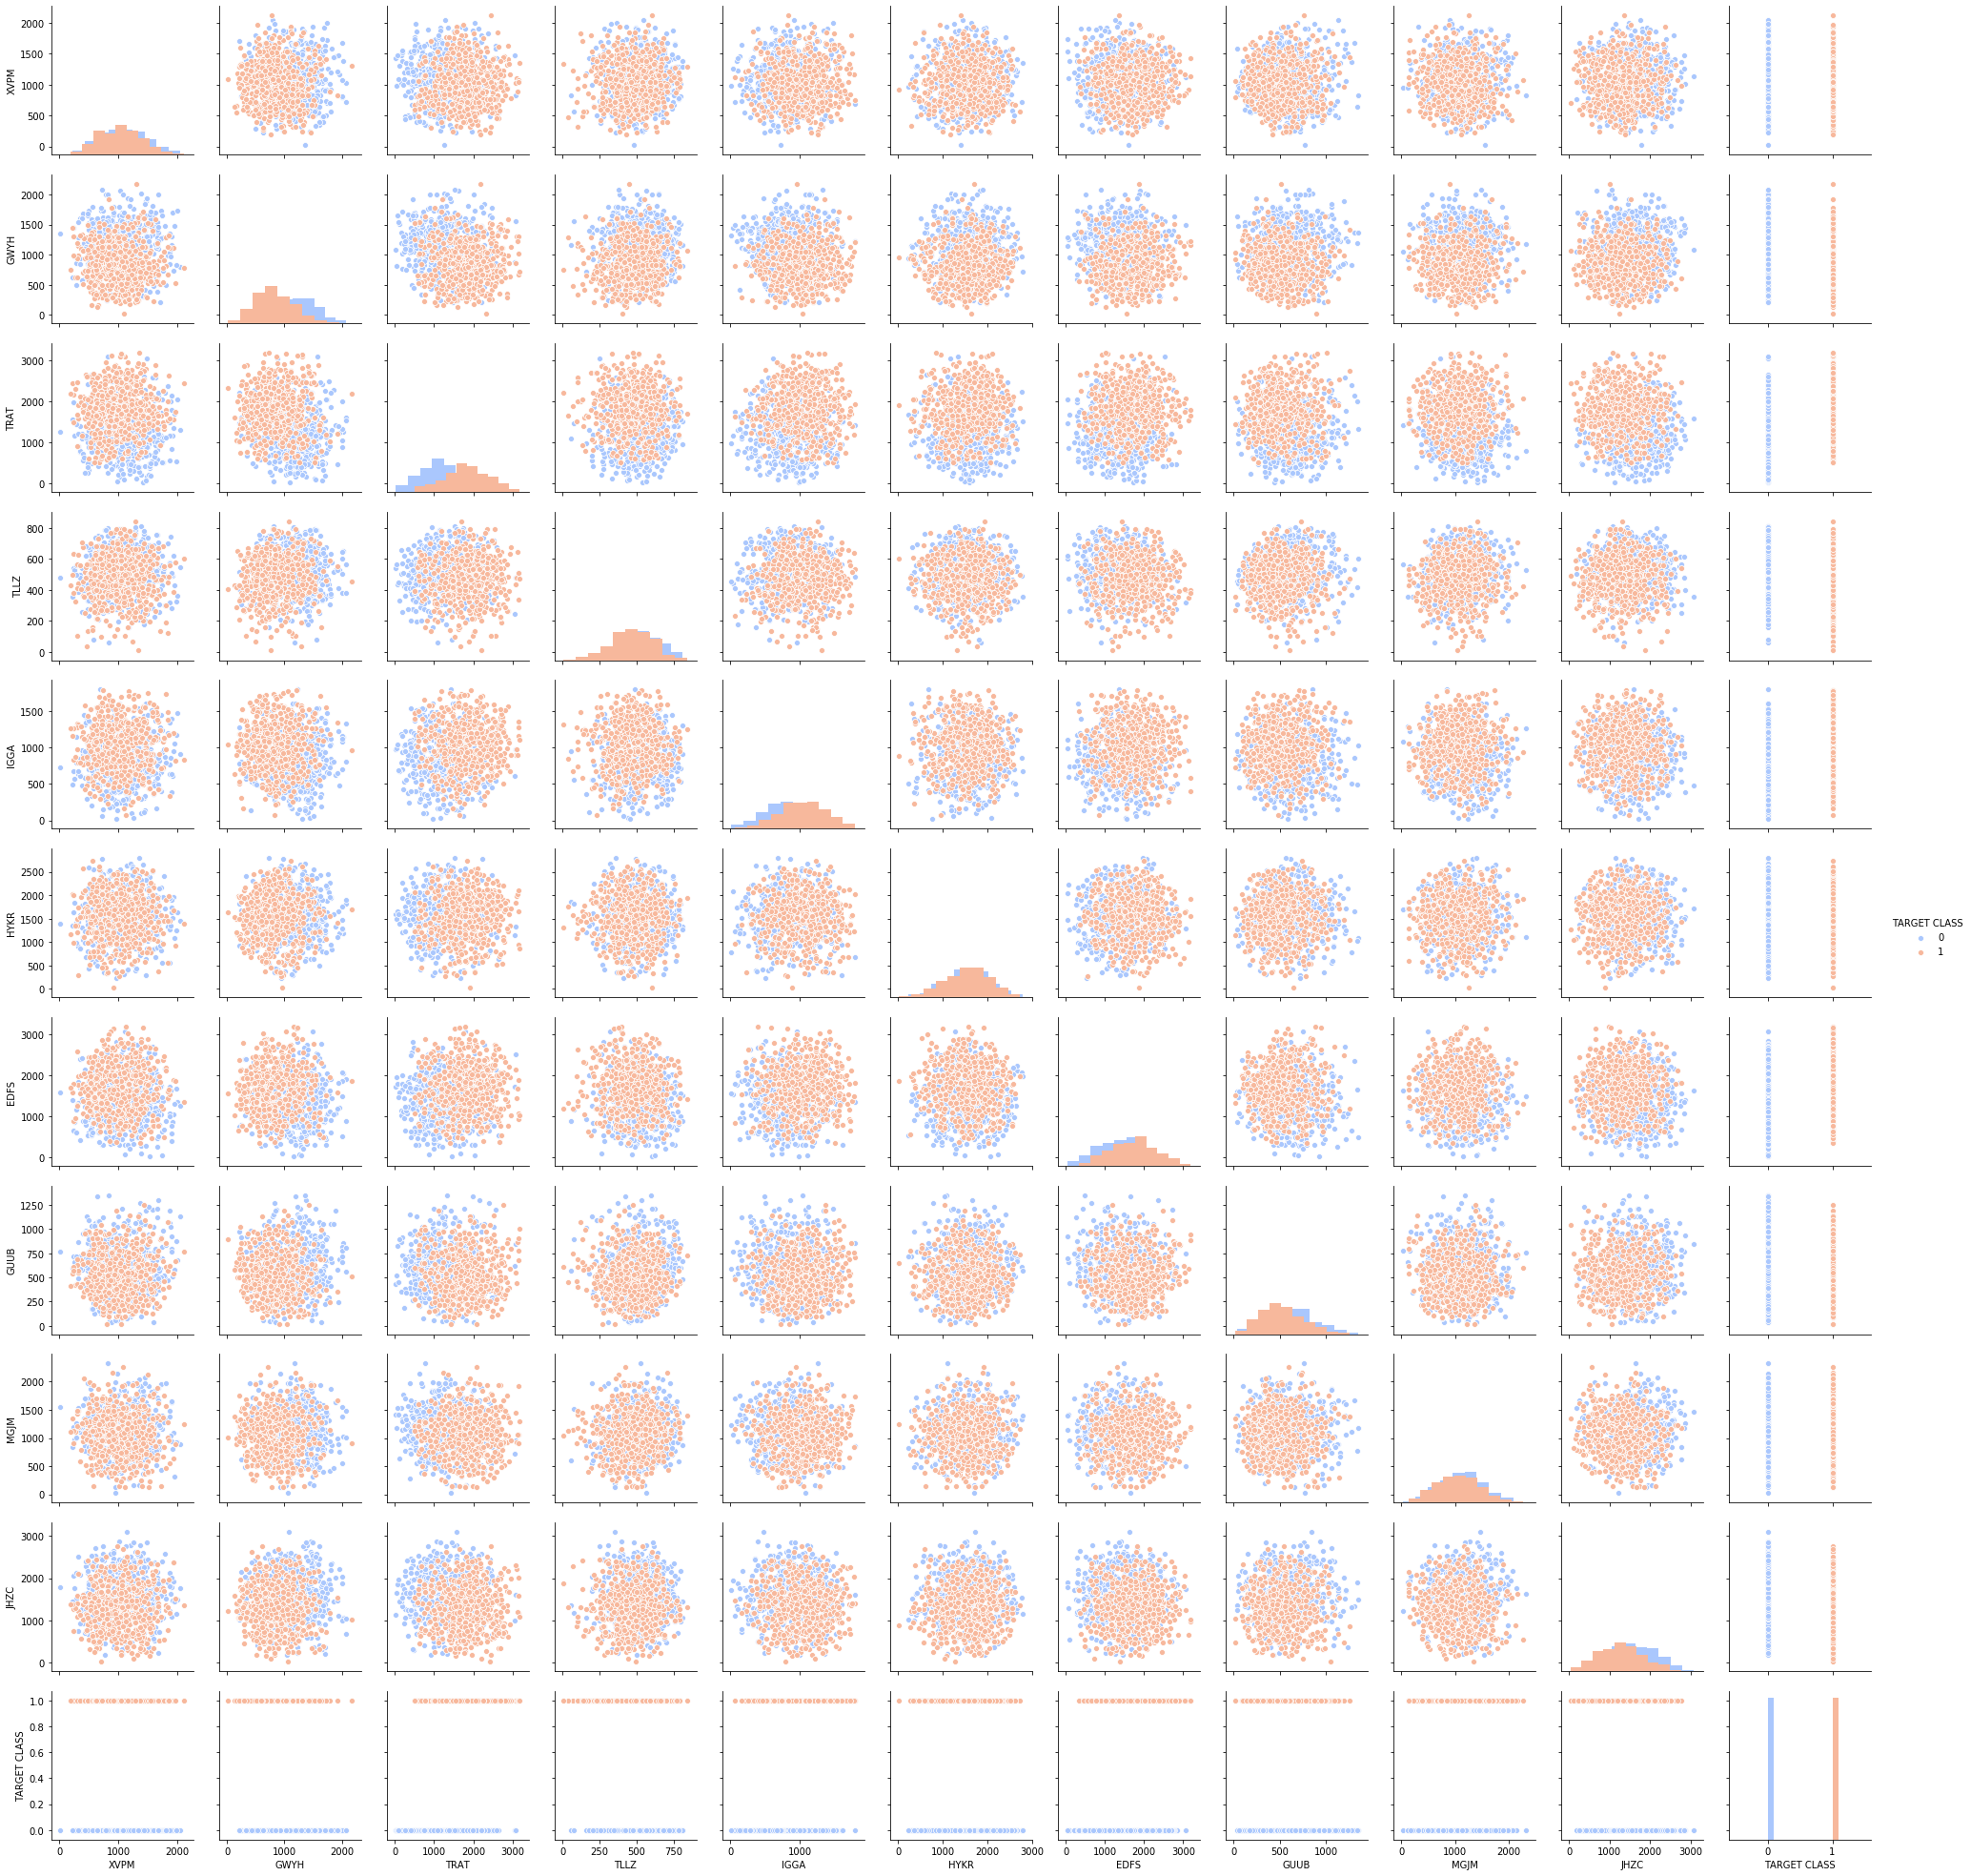

In [6]:
sns.pairplot(data, hue='TARGET CLASS', diag_kind='hist', palette='coolwarm');

# Padronize as variáveis

Hora de para padronizar as variáveis.

** Import StandardScaler do Scikit-learn. **

In [22]:
from sklearn.preprocessing import StandardScaler

** Crie um objeto StandardScaler() chamado scaler. **

In [23]:
scaler = StandardScaler()

** Use o método fit() do objeto para treinar o modelo. **

In [24]:
scaler.fit(data.drop(columns='TARGET CLASS'))

StandardScaler(copy=True, with_mean=True, with_std=True)

** Use o método .transform () para transformar os parâmetros em uma versão padronizada. **

In [25]:
scaler.transform(data.drop(columns='TARGET CLASS'))

array([[ 1.56852168, -0.44343461,  1.61980773, ..., -0.93279392,
         1.00831307, -1.06962723],
       [-0.11237594, -1.05657361,  1.7419175 , ..., -0.46186435,
         0.25832069, -1.04154625],
       [ 0.66064691, -0.43698145,  0.77579285, ...,  1.14929806,
         2.1847836 ,  0.34281129],
       ...,
       [-0.35889496, -0.97901454,  0.83771499, ..., -1.51472604,
        -0.27512225,  0.86428656],
       [ 0.27507999, -0.99239881,  0.0303711 , ..., -0.03623294,
         0.43668516, -0.21245586],
       [ 0.62589594,  0.79510909,  1.12180047, ..., -1.25156478,
        -0.60352946, -0.87985868]])

** Converta os parâmetros padronizados em um DataFrame e verifique o cabeçalho desse DataFrame para garantir que a transform() funcionou. **

In [29]:
scaler_ss = pd.DataFrame(scaler.transform(data.drop(columns='TARGET CLASS')), columns=data.columns[:-1])
scaler_ss.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,0.660647,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.011533,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,-0.099059,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762


# Divisão treino-teste

** Use o método train_test_split para dividir seus dados em um conjunto treino e teste.**

In [30]:
from sklearn.model_selection import train_test_split

In [32]:
xtrain, xtest, ytrain, ytest = train_test_split(scaler_ss, data['TARGET CLASS'], train_size=0.75)

# Usando o KNN

** Importe o KNeighborClassifier do scikit learn. **

In [33]:
from sklearn.neighbors import KNeighborsClassifier

** Crie uma instância do modelo KNN com n_neighbors = 1 **

In [34]:
model = KNeighborsClassifier(1)

** Ajuste este modelo KNN aos dados de treinamento. **

In [36]:
model.fit(xtrain, ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

# Previsões e avaliações
Vamos avaliar o nosso modelo KNN!

** Use o método de previsão para prever valores usando seu modelo KNN e X_test. **

In [37]:
ypred = model.predict(xtest)

** Crie uma matriz de confusão e um relatório de classificação. **

In [38]:
from sklearn.metrics import confusion_matrix

In [39]:
confusion_matrix(ytest, ypred)

array([[97, 33],
       [28, 92]])

In [41]:
from sklearn.metrics import classification_report

print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.78      0.75      0.76       130
           1       0.74      0.77      0.75       120

    accuracy                           0.76       250
   macro avg       0.76      0.76      0.76       250
weighted avg       0.76      0.76      0.76       250



# Escolhendo o valor K
Vamos continuar usando o método do cotovelo para escolher um bom valor K!

** Crie um loop for que treine vários modelos KNN com valores k diferentes e, em seguida, mantenha um registro do error_rate para cada um desses modelos com uma lista. Consulte o notebook se você estiver confuso nesta etapa. **

In [49]:
error_rate = []
ks = range(1, 101)

for k in ks:
    knn = KNeighborsClassifier(k)
    knn.fit(xtrain, ytrain)
    ypred = knn.predict(xtest)
    error_rate.append(np.mean(ypred!=ytest))

** Agora crie o seguinte gráfico usando as informações do seu loop. **

In [63]:
sns.set_style('whitegrid')

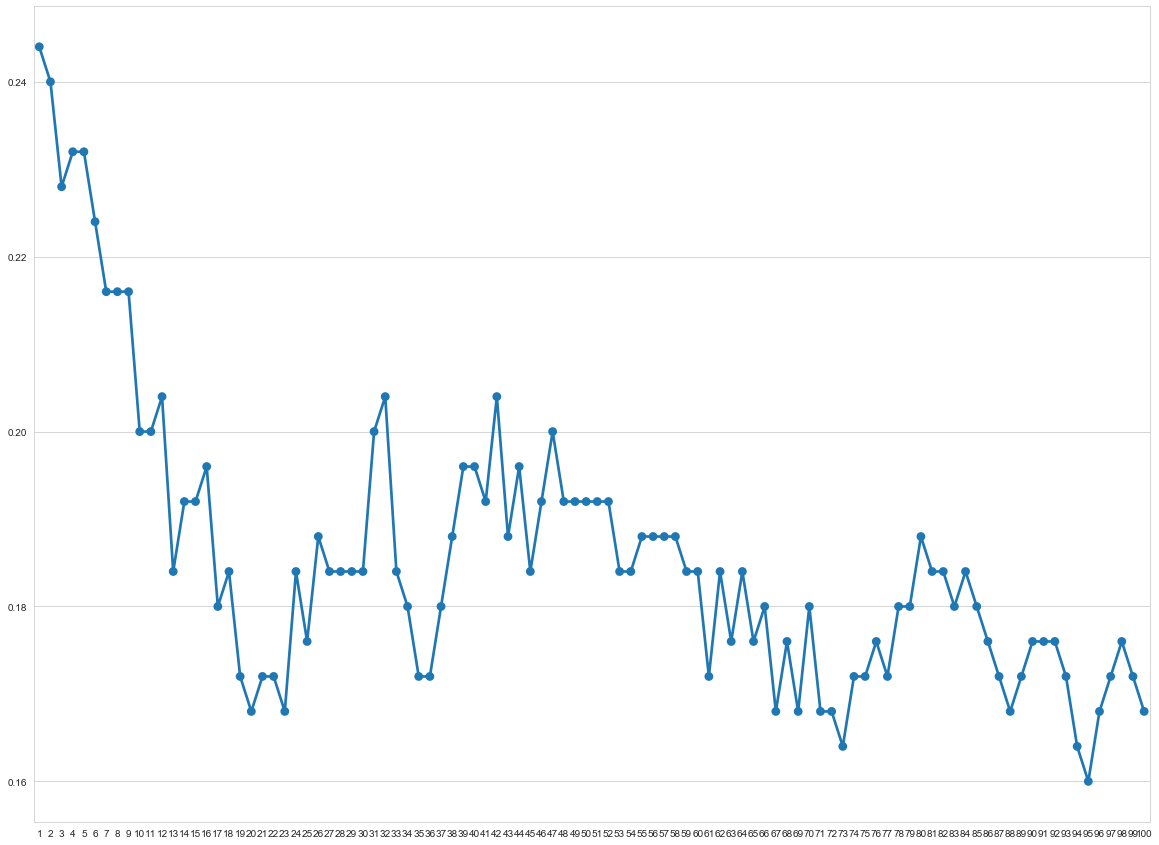

In [64]:
plt.figure(figsize=(20, 15))
sns.pointplot(np.array(ks), error_rate);

## Treine seu modelo novamente com novo valor K

** Treine novamente seu modelo com o melhor valor K (até você para decidir o que deseja) e re-faça o relatório de classificação e a matriz de confusão. **

In [65]:
model = KNeighborsClassifier(73)
model.fit(xtrain, ytrain)
ypred = model.predict(xtest)
confusion_matrix(ytest, ypred)

array([[105,  25],
       [ 16, 104]])

In [66]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.87      0.81      0.84       130
           1       0.81      0.87      0.84       120

    accuracy                           0.84       250
   macro avg       0.84      0.84      0.84       250
weighted avg       0.84      0.84      0.84       250

